In [1]:
from pyspark import SparkContext
sc = SparkContext()

In [5]:
sc.stop()

In [2]:
rdd_base_abril = sc.textFile('201704_Usage_Bicimad.json')
rdd_base_mayo = sc.textFile('201705_Usage_Bicimad.json')
rdd_base_junio = sc.textFile('201706_Usage_Bicimad.json')
rdd_base_julio = sc.textFile('201707_Usage_Bicimad.json')
rdd_base_agosto = sc.textFile('201708_Usage_Bicimad.json')
rdd_base_septiembre = sc.textFile('201709_Usage_Bicimad.json')
rdd_base_octubre = sc.textFile('201710_Usage_Bicimad.json')
rdd_base_noviembre = sc.textFile('201711_Usage_Bicimad.json')
rdd_base_diciembre = sc.textFile('201712_Usage_Bicimad.json')
rdd_base_enero = sc.textFile('201801_Usage_Bicimad.json')
rdd_base_febrero = sc.textFile('201802_Usage_Bicimad.json')
rdd_base_marzo = sc.textFile("201803_Usage_Bicimad.json")

rdd_base = [rdd_base_abril,rdd_base_mayo,rdd_base_junio,rdd_base_julio,rdd_base_agosto,rdd_base_septiembre,rdd_base_octubre,rdd_base_noviembre,rdd_base_diciembre,rdd_base_enero,rdd_base_febrero,rdd_base_marzo]

In [8]:
rdd_base_abril.count()

253519

In [9]:
import json

In [10]:
json.loads(rdd_base_abril[0][0])

TypeError: 'RDD' object is not subscriptable

In [13]:
def mapper(line):
    data = json.loads(line)
    estacion_salida = data['idunplug_station']
    base_salida = data['idunplug_base']
    estacion_llegada = data['idplug_station']
    base_llegada = data['idplug_base']
    rango_edad = data['ageRange']
    tipo_abono = data['user_type']
    usuario_dia = data['user_day_code']
    tiempo_viaje = data['travel_time']
    tiempo_salida = data['unplug_hourTime']
    return estacion_salida,base_salida,estacion_llegada,base_llegada,rango_edad,tipo_abono,usuario_dia,tiempo_viaje,tiempo_salida

In [14]:



rdd_abril = rdd_base_abril.map(mapper)
rdd_mayo = rdd_base_mayo.map(mapper)
rdd_junio = rdd_base_junio.map(mapper)
rdd_julio = rdd_base_julio.map(mapper)
rdd_agosto = rdd_base_agosto.map(mapper)
rdd_septiembre = rdd_base_septiembre.map(mapper)
rdd_octubre = rdd_base_octubre.map(mapper)
rdd_noviembre = rdd_base_noviembre.map(mapper)
rdd_diciembre = rdd_base_diciembre.map(mapper)
rdd_enero = rdd_base_enero.map(mapper)
rdd_febrero = rdd_base_febrero.map(mapper)
rdd_marzo = rdd_base_marzo.map(mapper)

In [15]:
rdd_abril.take(3)

[(41,
  1,
  50,
  17,
  4,
  1,
  'df843a74bba22d2b363e4e96f74b99391276e71dfea92e0a11de4fe552f38173',
  169,
  {'$date': '2017-04-01T01:00:00.000+0200'}),
 (95,
  14,
  90,
  2,
  5,
  1,
  '6a7cf4393301d25f5a2eeaff8c7ba5d406f514ebd086aa15c88173dca8eeef65',
  271,
  {'$date': '2017-04-01T01:00:00.000+0200'}),
 (15,
  5,
  16,
  5,
  4,
  1,
  '877deab4cc256bb87e02abc1db75005ac2b66d65be88499a5142a6fa2e06eea1',
  171,
  {'$date': '2017-04-01T01:00:00.000+0200'})]

## Usuarios por Tipo

In [41]:
# Contamos el porcentaje de viajes de ida y vuelta

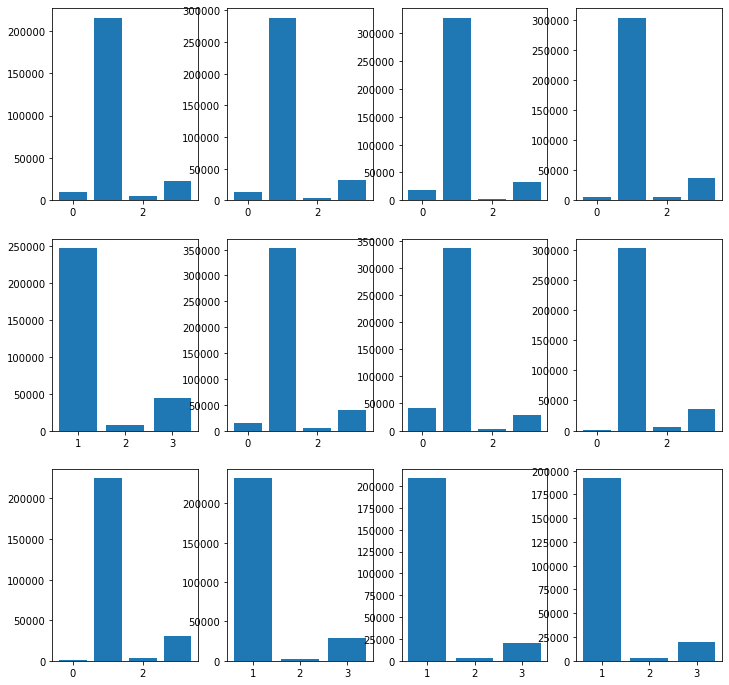

In [45]:
# Histogramas por tipo de abono y mes.
import matplotlib.pyplot as plt
def map_user(line):
    data = json.loads(line)
    tipo_usuario = data['user_type']
    return tipo_usuario
plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
for i in range(len(rdd_base)):
    tipo_usuario=rdd_base[i].map(map_user).countByValue()
    fig.add_subplot(3,4,i+1)
    plt.bar(tipo_usuario.keys(),tipo_usuario.values())

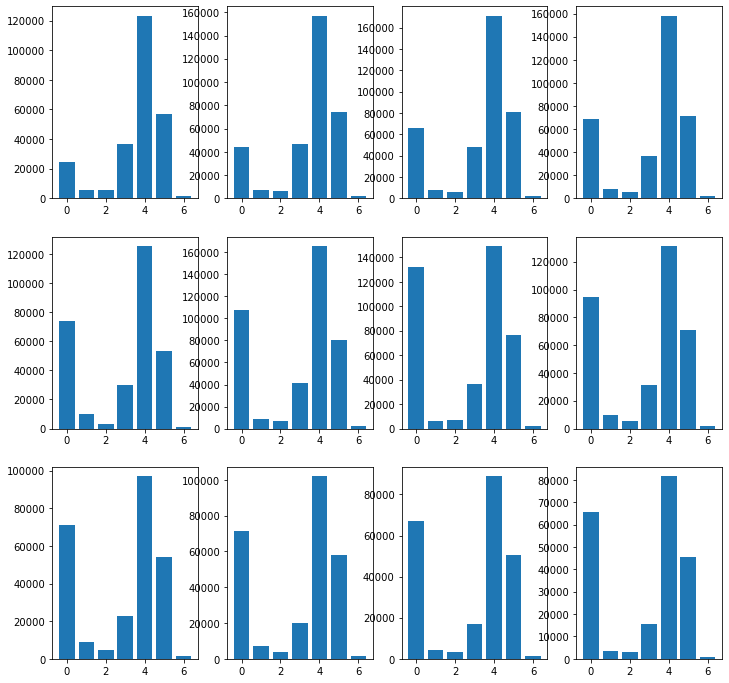

In [43]:
# Histogramas por rango de edad y mes.
import matplotlib.pyplot as plt
def map_user(line):
    data = json.loads(line)
    rango_edad = data['ageRange']
    return rango_edad
plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
for i in range(len(rdd_base)):
    rango_edad=rdd_base[i].map(map_user).countByValue()
    fig.add_subplot(3,4,i+1)
    plt.bar(rango_edad.keys(),rango_edad.values())


In [53]:
#Elaboramos un top de usuarios por día de uso y mostramos la duración media por día de los viajes.
from datetime import datetime as dt
def map_user(line):
    data = json.loads(line)
    dia = data['unplug_hourTime']['$date']
    usuario_dia = data['user_day_code']
    tiempo_viaje = data['travel_time']
    return dt.date(dt.strptime(dia, '%Y-%m-%dT%H:%M:%S.%f%z')), usuario_dia, tiempo_viaje
def map_(line):
    data = json.loads(line)
    tiempo_viaje = data['travel_time']
    return tiempo_viaje
a=rdd_base[0].map(map_user)
b=a.groupByKey().mapValues(type(a.keys().first())).collect()

#rdd_base[0].reduceByKey(lambda x,y: x+y).map(map_user).take(10)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 5 in stage 56.0 failed 1 times, most recent failure: Lost task 5.0 in stage 56.0 (TID 256, aula125.mat.ucm.es, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 605, in main
    process()
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 595, in process
    out_iter = func(split_index, iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 2596, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 2596, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 425, in func
    return f(iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 2030, in combine
    merger.mergeValues(iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py", line 238, in mergeValues
    for k, v in iterator:
ValueError: too many values to unpack (expected 2)

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:503)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:638)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:621)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:456)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2008)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2007)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2007)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:973)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2239)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2188)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2177)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:775)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2120)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2139)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2164)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1004)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:388)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1003)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:168)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 605, in main
    process()
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 595, in process
    out_iter = func(split_index, iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 2596, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 2596, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 425, in func
    return f(iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 2030, in combine
    merger.mergeValues(iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py", line 238, in mergeValues
    for k, v in iterator:
ValueError: too many values to unpack (expected 2)

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:503)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:638)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:621)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:456)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [36]:

dt.date(dt.strptime('2017-04-01', '%Y-%m-%d')) == 

SyntaxError: invalid syntax (<ipython-input-36-b6a6939e8004>, line 1)

## Métricas por mes

In [155]:
#Usando una asignación de variable para seleccionar el tipo
a=rdd_base[0].map(map_user)
a.take(10)



#selected_type = 1
#rdd_users = rdd.filter(lambda x: x[0]==selected_type).map(lambda x: (x[1],tuple(x[2:])))

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 10 in stage 186.0 failed 1 times, most recent failure: Lost task 10.0 in stage 186.0 (TID 1520, aula125.mat.ucm.es, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 605, in main
    process()
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 595, in process
    out_iter = func(split_index, iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 2596, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 425, in func
    return f(iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 2030, in combine
    merger.mergeValues(iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py", line 238, in mergeValues
    for k, v in iterator:
ValueError: too many values to unpack (expected 2)

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:503)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:638)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:621)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:456)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2008)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2007)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2007)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:973)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2239)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2188)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2177)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:775)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2120)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2139)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:154)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor56.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 605, in main
    process()
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 595, in process
    out_iter = func(split_index, iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 2596, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 425, in func
    return f(iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 2030, in combine
    merger.mergeValues(iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py", line 238, in mergeValues
    for k, v in iterator:
ValueError: too many values to unpack (expected 2)

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:503)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:638)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:621)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:456)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [20]:
rdd_users.take(1)

[('81175b5aafaf561aee962b05ae44656e9fe275e37cde76c525c39df693beb336',
  (128, 136, 217, 3))]

In [21]:
rdd_users.count()

288357

In [ ]:
#Se puede seleccionar el tipo en el momento de la ejecución
selected_type = int(input('Introduce el tipo de usuario a seleccionar: '))
rdd_users = rdd.filter(lambda x: x[0]==selected_type).map(lambda x: (x[1],tuple(x[2:])))
rdd_users.count()

## Usuarios con un solo uso diario

In [22]:
+rdd_users.groupByKey().mapValues(tuple).filter(lambda x: len(x[1])==1).count()

96957

## Adyacentes ordenados

Una alternativa a considerar es partir de los datos originales rdd_base 
y hacer un mapeo y filtro específico para este problema como vimos en 
la solución al ejercicio Usuarios por Tipo.

Para formentar la visión de notebook, de trabajo incremental sobre los datos, 
podemos partir de los datos generados/seleccionados previamente en rdd_users 
y quedarnos únicamente con la información que nos interesa: 
origen y destino de los trayectos.

In [36]:
rdd_trips = rdd_users.map(lambda x: (x[1][0], x[1][1]))
rdd_trips.take(2)

[(128, 136), (6, 163)]

In [37]:
rdd_trips.count()

288357

In [38]:
# Con un groupBykey agrupamos los trayectos por origen, luego, con los resultados agrupados
# generamos la solución: pares con clave la estación de destino y el valor el número de 
# trayectos que han llegado a ella desde la estación de origen considerada

#Primero la agrupación de adyacentes sin orden ni estructura
rdd_trips.groupByKey().mapValues(tuple).take(2)
#Lo que tenemos que mejorar es la función que utilizamos 
#en los values asociados a cada clave. 

[(100,
  (47,
   90,
   7,
   95,
   16,
   6,
   47,
   129,
   19,
   100,
   12,
   120,
   67,
   67,
   153,
   19,
   129,
   45,
   45,
   90,
   140,
   72,
   30,
   170,
   129,
   19,
   103,
   103,
   12,
   19,
   56,
   47,
   83,
   167,
   93,
   113,
   33,
   72,
   73,
   101,
   104,
   105,
   93,
   140,
   170,
   30,
   106,
   126,
   162,
   126,
   129,
   163,
   7,
   131,
   47,
   19,
   129,
   128,
   3,
   159,
   89,
   144,
   76,
   67,
   172,
   6,
   97,
   13,
   56,
   170,
   59,
   129,
   167,
   33,
   30,
   135,
   140,
   147,
   161,
   110,
   30,
   129,
   155,
   79,
   129,
   170,
   12,
   100,
   19,
   96,
   172,
   174,
   84,
   65,
   55,
   133,
   33,
   171,
   23,
   79,
   7,
   89,
   135,
   45,
   76,
   173,
   171,
   113,
   113,
   38,
   84,
   84,
   170,
   129,
   16,
   155,
   167,
   7,
   7,
   53,
   127,
   136,
   140,
   167,
   30,
   161,
   25,
   135,
   40,
   88,
   155,
   19,
   103,
   162,

In [28]:
#Utilizamos una función definida. Primero la usamos sólo para contar
def count(values):
    d = {}
    for v in values:
        if v in d:
            d[v] += 1
        else:
            d[v] = 1
    return d
            
rdd_trips.groupByKey().mapValues(count).take(2)



[(100,
  {47: 21,
   90: 10,
   7: 14,
   95: 6,
   16: 5,
   6: 8,
   129: 32,
   19: 36,
   100: 17,
   12: 33,
   120: 1,
   67: 4,
   153: 4,
   45: 19,
   140: 13,
   72: 5,
   30: 32,
   170: 25,
   103: 11,
   56: 18,
   83: 13,
   167: 15,
   93: 9,
   113: 10,
   33: 8,
   73: 3,
   101: 3,
   104: 10,
   105: 5,
   106: 3,
   126: 10,
   162: 24,
   163: 31,
   131: 11,
   128: 13,
   3: 7,
   159: 3,
   89: 13,
   144: 4,
   76: 9,
   172: 6,
   97: 7,
   13: 1,
   59: 16,
   135: 18,
   147: 9,
   161: 10,
   110: 6,
   155: 20,
   79: 11,
   96: 8,
   174: 7,
   84: 23,
   65: 5,
   55: 2,
   133: 1,
   171: 3,
   23: 12,
   173: 14,
   38: 3,
   53: 4,
   127: 1,
   136: 2,
   25: 3,
   40: 3,
   88: 1,
   4: 3,
   166: 19,
   10: 6,
   160: 9,
   43: 7,
   71: 2,
   5: 7,
   168: 10,
   8: 5,
   138: 3,
   62: 19,
   2: 6,
   1: 7,
   149: 5,
   21: 2,
   107: 6,
   118: 2,
   44: 4,
   115: 2,
   116: 3,
   86: 14,
   18: 7,
   132: 2,
   82: 10,
   20: 11,
   108: 17,


In [29]:
#Ahora la mejoramos para que cuente y ordene
def count_and_sort(values):
    d = {}
    for v in values:
        if v in d:
            d[v] += 1
        else:
            d[v] = 1
    return sorted(d.items(), key=lambda x: x[1], reverse=True)
            
rdd_trips.groupByKey().mapValues(count_and_sort).take(2)
#El resultado nos muestra la estación de origen y luego, en una lista pares 
#(estación de destino,número de trayectos), ordenados por número de trayectos.

[(100,
  [(19, 36),
   (12, 33),
   (129, 32),
   (30, 32),
   (163, 31),
   (170, 25),
   (162, 24),
   (84, 23),
   (47, 21),
   (155, 20),
   (45, 19),
   (166, 19),
   (62, 19),
   (169, 19),
   (56, 18),
   (135, 18),
   (100, 17),
   (108, 17),
   (81, 17),
   (59, 16),
   (167, 15),
   (7, 14),
   (173, 14),
   (86, 14),
   (94, 14),
   (140, 13),
   (83, 13),
   (128, 13),
   (89, 13),
   (9, 13),
   (23, 12),
   (58, 12),
   (103, 11),
   (131, 11),
   (79, 11),
   (20, 11),
   (90, 10),
   (113, 10),
   (104, 10),
   (126, 10),
   (161, 10),
   (168, 10),
   (82, 10),
   (93, 9),
   (76, 9),
   (147, 9),
   (160, 9),
   (57, 9),
   (6, 8),
   (33, 8),
   (96, 8),
   (3, 7),
   (97, 7),
   (174, 7),
   (43, 7),
   (5, 7),
   (1, 7),
   (18, 7),
   (146, 7),
   (95, 6),
   (172, 6),
   (110, 6),
   (10, 6),
   (2, 6),
   (107, 6),
   (37, 6),
   (164, 6),
   (16, 5),
   (72, 5),
   (105, 5),
   (65, 5),
   (8, 5),
   (149, 5),
   (51, 5),
   (67, 4),
   (153, 4),
   (144, 4),
 

In [ ]:
#Nota: Utilizando algunas funciones definidas podemos ahorrarnos la definición de una 
#función específica

from collections import Counter
rdd_trips.groupByKey().mapValues(Counter).take(3)

## Histograma de viajes por usuario/día

In [30]:
result_dict = rdd_users.groupByKey().mapValues(tuple).mapValues(len).\
                        map(lambda x: (x[1],x[0])).countByKey()

In [31]:
print('total de trayectos iniciales', rdd_users.count())
print(result_dict)
#pequeña comprobación
total = 0 
for k,v in result_dict.items():
    total += k*v
print ('total de trayectos en histograma', total)

total de trayectos iniciales 288357
defaultdict(<class 'int'>, {1: 96957, 3: 14695, 4: 6071, 2: 55200, 5: 1597, 6: 481, 9: 12, 7: 118, 8: 56, 11: 6, 10: 7, 14: 2, 12: 8, 17: 1, 13: 2, 25: 1, 15: 1, 19: 1, 16: 1})
total de trayectos en histograma 288357


In [32]:
#Para ordenar el diccionario con los resultados por número de viajes
sorted(result_dict.items())

[(1, 96957),
 (2, 55200),
 (3, 14695),
 (4, 6071),
 (5, 1597),
 (6, 481),
 (7, 118),
 (8, 56),
 (9, 12),
 (10, 7),
 (11, 6),
 (12, 8),
 (13, 2),
 (14, 2),
 (15, 1),
 (16, 1),
 (17, 1),
 (19, 1),
 (25, 1)]

<BarContainer object of 19 artists>

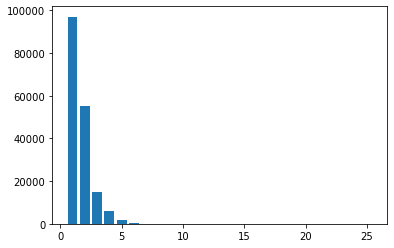

In [33]:
#Una visualización sencilla
import matplotlib.pyplot as plt
plt.bar(result_dict.keys(),result_dict.values())

## Return Trips

In [34]:
# Nos quedamos con los usuarios que han realizado exactamente dos viajes en un día, 
# muy parecido a como hicimos el ejercicio "Usuarios con un solo uso diario"
# Luego utilizamos la función ´cicle´ para definir lo que es un ciclo, el enunciado
# da una definición, pero puede haber otras.
def cicle(data):
    p1 = data[1][0]
    p2 = data[1][1]
    return p1[0]==p2[1]

rdd_return_trip = rdd_users.groupByKey().mapValues(tuple)\
    .filter(lambda x: len(x[1])==2).filter(cicle)

In [35]:
#Ahora mostramos el resultado ordenado como pide el enunciado.
rdd_return_trip.map(lambda x: (x[1][0][0],x[0])).\
groupByKey().mapValues(len).takeOrdered(10, lambda x: -x[1])

[(163, 500),
 (129, 500),
 (149, 432),
 (135, 428),
 (83, 427),
 (160, 381),
 (168, 381),
 (43, 369),
 (79, 364),
 (128, 363)]

In [4]:
rdd=rdd_base_mayo
rdd.take(2)

Py4JJavaError: An error occurred while calling o22.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/home/alumno/BiciMad/201705_Usage_Bicimad.json
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:287)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:229)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:315)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:205)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:276)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:272)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:276)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:272)
	at org.apache.spark.api.java.JavaRDDLike.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.JavaRDDLike.partitions$(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [51]:
import re
PATTERN = re.compile(r'[+][0-9]+$')

def tiempo(content):
    """
    Una funcion para transformar string a objeto datetime, usando una
    expresion regular.
    """
    
    match = PATTERN.search(content)
    if match:
        formato = '%Y-%m-%dT%H:%M:%S.%f%z'  
    else:
        formato = '%Y-%m-%dT%H:%M:%SZ'
        
    return datetime.datetime.strptime(content, formato)

#Elaboramos un top de usuarios por día de uso y mostramos la duración media por día de los viajes.
from datetime import datetime as dt
def map_user(line):
    data = json.loads(line)
    dia = data['unplug_hourTime']['$date']
    usuario_dia = data['user_day_code']
    tiempo_viaje = data['travel_time']
    return dt.date(dt.strptime(dia, '%Y-%m-%dT%H:%M:%S.%f%z')), usuario_dia, tiempo_viaje
def map_(line):
    data = json.loads(line)
    tiempo_viaje = data['travel_time']
    return tiempo_viaje
a=leer('202001_movements.json')
b=a.groupByKey().mapValues(type(a.keys().first())).collect()

#rdd_base[0].reduceByKey(lambda x,y: x+y).map(map_user).take(10)


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 47.0 failed 1 times, most recent failure: Lost task 0.0 in stage 47.0 (TID 78, aula125.mat.ucm.es, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 605, in main
    process()
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 597, in process
    serializer.dump_stream(out_iter, outfile)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 271, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 1440, in takeUpToNumLeft
    yield next(iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 107, in wrapper
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 1683, in <lambda>
    return self.map(lambda x: x[0])
KeyError: 0

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:503)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:638)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:621)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:456)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:315)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:313)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:307)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:307)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:294)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:288)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$runJob$1(PythonRDD.scala:154)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2139)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2008)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2007)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2007)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:973)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2239)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2188)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2177)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:775)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2120)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2139)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:154)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor50.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 605, in main
    process()
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 597, in process
    serializer.dump_stream(out_iter, outfile)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 271, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 1440, in takeUpToNumLeft
    yield next(iterator)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 107, in wrapper
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/rdd.py", line 1683, in <lambda>
    return self.map(lambda x: x[0])
KeyError: 0

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:503)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:638)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:621)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:456)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:315)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:313)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:307)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:307)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:294)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:288)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$runJob$1(PythonRDD.scala:154)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2139)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:446)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:449)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [58]:
VALORES = ['user_day_code','user_type','ageRange','idplug_station',
         'idunplug_station','unplug_hourTime','travel_time']
import json


def leer(lista):
    
    def adaptar(dicc):
        """
        Desempaqueta las fechas en forma unplug_hourTime: {$date: string}.
        """
    
        if isinstance(dicc['unplug_hourTime'], dict):
            dicc['unplug_hourTime'] = dicc['unplug_hourTime']['$date']
            
        return dicc
  
    
    if not isinstance(lista, list):
        lista = [lista]
        
    sc = SparkContext.getOrCreate()
    aux = lambda x: {a:x[a] for a in VALORES}
    
    total = sc.textFile(lista[0]).map(json.loads).map(aux)
    
    for archivo in lista[1:]:
        dat = sc.textFile(archivo).map(json.loads).map(aux)
        total = total.union(dat)
    
    return total.map(adaptar)

In [59]:
#Usuarios que mas viajes han realizado en un dia
a = leer('202001_movements.json')
rdd = a.map(lambda x: (x['user_day_code'],x)).groupByKey().mapValues(list)
numero = rdd.mapValues(len).sortBy(keyfunc=lambda x: x[1],ascending=False)
numero.take(10)

[('034bf7065e3ef64c4d4455c45fb435e1495eec6a143a6ef7d99829164c555b94', 131),
 ('11770e48c981871a3a8bcabaa08ae499449a6eb6178cb6beb72b4713b3d781c1', 124),
 ('85b2d84388d0d4a2bc54321b58024321da67a5d217a6e36b9310a04f7b7f7ac9', 120),
 ('eb1481e316063b5fa0034918025b8753575d6b71f388ca2fc506874c42789097', 118),
 ('ce6e9d365f5cedc35f8774e2ca40546a6b3bf7c5fb07c68eaaa7a2e7e04f8385', 106),
 ('099feef2cbc08ac9bf09e9234a6c5ecfdb90f23d6a680fc6127870b18c4ae7ef', 105),
 ('b92052b0c7bc2245f8d3afaf68fd1bfce19993ac0a6c565c28c18caae5392031', 105),
 ('92760b4d7de5ffc75fb9bdde160450cce9c9f26dd1bfe42c10770682be601e39', 104),
 ('4c8dbcfdf3e8048ab57ed56399aef1be155ab5efc1bd64ac2043580ac8b76ad2', 100),
 ('46b891e30eeb3cc154485796c47fb99495f926f69e647aafe2c13aa362c84dbb', 99)]

In [60]:
# Usuarios cuyo ultimo viaje acaba en la misma estacion donde empezo.
ida = rdd.filter(lambda x: x[1][0]['idunplug_station']==x[1][-1]['idplug_station'])
ida.take(5)

[('fb42cff39b05a2f728b18aac2a00a5c8c76e4095c737f204ff8ae53fa9429d83',
  [{'user_day_code': 'fb42cff39b05a2f728b18aac2a00a5c8c76e4095c737f204ff8ae53fa9429d83',
    'user_type': 1,
    'ageRange': 0,
    'idplug_station': 80,
    'idunplug_station': 82,
    'unplug_hourTime': '2020-01-01T00:00:00Z',
    'travel_time': 757},
   {'user_day_code': 'fb42cff39b05a2f728b18aac2a00a5c8c76e4095c737f204ff8ae53fa9429d83',
    'user_type': 1,
    'ageRange': 0,
    'idplug_station': 82,
    'idunplug_station': 79,
    'unplug_hourTime': '2020-01-01T05:00:00Z',
    'travel_time': 892}]),
 ('9285dafc73260501104a8bf782ceefdac1f34e4af7d600b159eceafc74d5ecad',
  [{'user_day_code': '9285dafc73260501104a8bf782ceefdac1f34e4af7d600b159eceafc74d5ecad',
    'user_type': 1,
    'ageRange': 5,
    'idplug_station': 197,
    'idunplug_station': 204,
    'unplug_hourTime': '2020-01-01T00:00:00Z',
    'travel_time': 608},
   {'user_day_code': '9285dafc73260501104a8bf782ceefdac1f34e4af7d600b159eceafc74d5ecad',
    '

In [73]:
#Los viajes se enlazan, forman "camino"
def condicion(lista):
    
    b = True
    j = 1
    while j < len(lista):
        b = b and lista[j-1]['idunplug_station'] == lista[j]['idplug_station']
        j += 1
    return b    
    
temp = rdd.filter(lambda x: len(x[1])>2).filter(lambda x: condicion(x[1]))
temp.take(5)


[('f2ad1dfca20ac91815abe9d1219eb3fb2cd87e087c408caedfcb542ff2018a7c',
  [{'user_day_code': 'f2ad1dfca20ac91815abe9d1219eb3fb2cd87e087c408caedfcb542ff2018a7c',
    'user_type': 1,
    'ageRange': 0,
    'idplug_station': 176,
    'idunplug_station': 192,
    'unplug_hourTime': '2020-01-01T00:00:00Z',
    'travel_time': 863},
   {'user_day_code': 'f2ad1dfca20ac91815abe9d1219eb3fb2cd87e087c408caedfcb542ff2018a7c',
    'user_type': 1,
    'ageRange': 0,
    'idplug_station': 192,
    'idunplug_station': 176,
    'unplug_hourTime': '2020-01-01T13:00:00Z',
    'travel_time': 917},
   {'user_day_code': 'f2ad1dfca20ac91815abe9d1219eb3fb2cd87e087c408caedfcb542ff2018a7c',
    'user_type': 1,
    'ageRange': 0,
    'idplug_station': 176,
    'idunplug_station': 192,
    'unplug_hourTime': '2020-01-01T16:00:00Z',
    'travel_time': 779}]),
 ('0e8c93d0f3979d8e1ebe921ff21a4c3224f810a619a63a218664e3c38f4d1b89',
  [{'user_day_code': '0e8c93d0f3979d8e1ebe921ff21a4c3224f810a619a63a218664e3c38f4d1b89',
 

In [75]:
# Por tipo de usuario
rdd = a.map(lambda x: (x['user_type'],x)).groupByKey().mapValues(len)
rdd.collect()

[(3, 22693), (1, 249537), (2, 645)]